In [2]:
# in the software implementation we use the following
# terminology SAC_AcM = SPP-SAC 
# DDPG_AcM = SPP_DDPG
# TD3_AcM = SPP_TD3
# BasicAcM is an example CM
from rltoolkit import SAC_AcM, DDPG_AcM, TD3_AcM
from rltoolkit.acm.models.basic_acm import BasicAcM
import pickle as pkl
import torch
import gym
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    frame = env.render('rgb_array')
    plt.imshow(frame)
    #plt.imsave('gifs/%d.png' % (step), frame)
    
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [7]:
def visualise_episode(algo):
    obs = algo.env.reset()
    done = False
    ep_ret = 0
    i=0
    while(not done):       
        obs = algo.process_obs(obs)

        obs = algo.replay_buffer.normalize( obs )
        action, _ = algo._actor.act( obs , deterministic=True)
        show_state(algo.env, i)        
        action = algo.replay_buffer.denormalize(action, algo.acm_ob_idx)
        action_acm = algo.process_action(action, obs, algo.acm_ob_idx)
        obs, r, done, _ = algo.env.step(action_acm)
        ep_ret += r
        i+=1


# SPP-DDPG Ant

In [46]:
model_path = "../models/Ant_spp-ddpg_model.pkl"

ENV_NAME = "Ant-v3"

ddpg = DDPG_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

ddpg.load(model_path)

ddpg.test(5)

3801.1826285817892

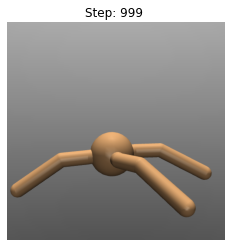

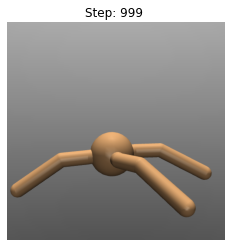

In [47]:
visualise_episode(ddpg)

# SPP-TD3 Ant

In [41]:
model_path = "../models/Ant_spp-td3_model.pkl"

ENV_NAME = "Ant-v3"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

4475.021016954563

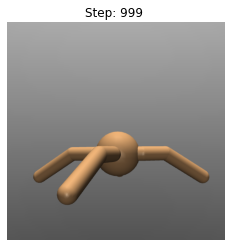

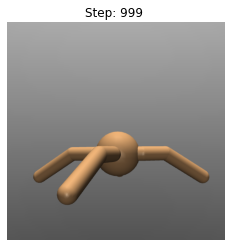

In [42]:
visualise_episode(td3)

# SPP-SAC Ant

In [43]:
model_path = "../models/Ant_spp-sac_model.pkl"

ENV_NAME = "Ant-v3"

sac = SAC_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

sac.load(model_path)

sac.test(5)

5020.19748570042

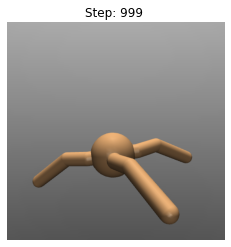

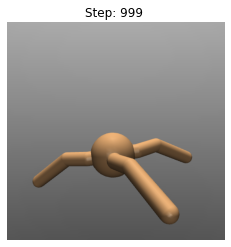

In [48]:
visualise_episode(sac)

# SPP-DDPG Humanoid

In [4]:
model_path = "../models/Humanoid_spp-ddpg_model.pkl"

ENV_NAME = "Humanoid-v3"

ddpg = DDPG_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

ddpg.load(model_path)

ddpg.test(5)

1803.2411549311523

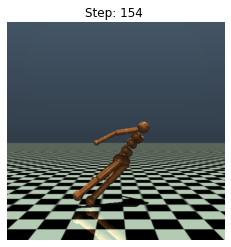

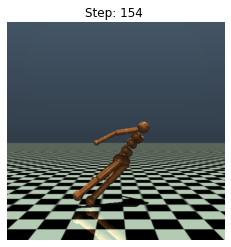

In [9]:
visualise_episode(ddpg)

# SPP-TD3 Humanoid

In [31]:
model_path = "../models/Humanoid_spp-td3_model.pkl"

ENV_NAME = "Humanoid-v3"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

4604.432088032661

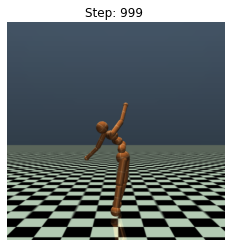

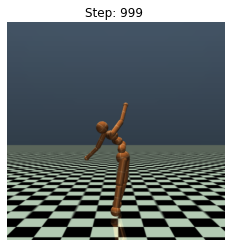

In [39]:
visualise_episode(td3)

# SPP-SAC Humanoid

In [50]:
model_path = "../models/Humanoid_spp-sac_model.pkl"

ENV_NAME = "Humanoid-v3"

sac = SAC_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

sac.load(model_path)

sac.test(5)

5419.397874089076

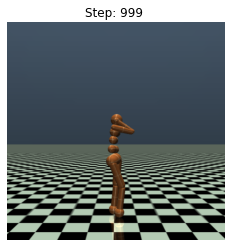

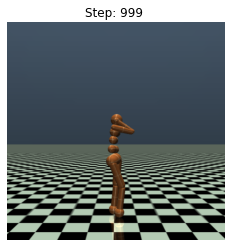

In [51]:
visualise_episode(sac)

# SPP-TD3 DoggoGoal from OpenAI SafetyGym

In [19]:
import safety_gym
from safety_gym.envs.engine import Engine
from gym.envs.registration import register, registry

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    frame = env.render('rgb_array', 3)
    plt.imshow(frame)
    
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [6]:
model_path = "../models/DoggoGoal_spp-td3_model.pkl"

ENV_NAME = "Safexp-DoggoGoal0-v0"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    max_episode_steps=1000,
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_ob_idx = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 58, 59, 60, 69, 70, 71],
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

84.22915104259616

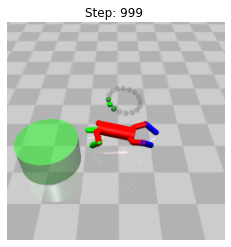

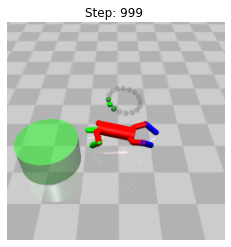

In [14]:
td3.env._old_render_mode = None
visualise_episode(td3)

# SPP-TD3 DoggoButton from OpenAI SafetyGym

In [16]:
model_path = "../models/DoggoButton_spp-td3_model.pkl"

ENV_NAME = "Safexp-DoggoButton0-v0"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    max_episode_steps=1000,
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_ob_idx = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 74, 75, 76, 85, 86, 87],
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

/home/cyranka/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/cyranka/repos/rltoolkit/rltoolkit/acm/off_policy/ddpg_acm.py:38: RuntimeWarning: divide by zero encountered in log
  custom_loss_scaled = np.log(np.exp(custom_loss) - 1)


110.95810908929859

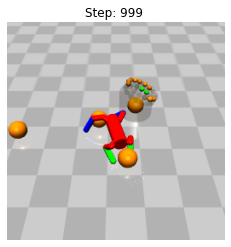

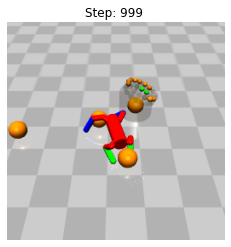

In [17]:
td3.env._old_render_mode = None
visualise_episode(td3)

# SPP-TD3 CarPush from OpenAI SafetyGym

In [22]:
model_path = "../models/CarPush_spp-td3_model.pkl"

ENV_NAME = "Safexp-CarPush0-v0"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    max_episode_steps=1000,
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_ob_idx = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

9.289146669802264

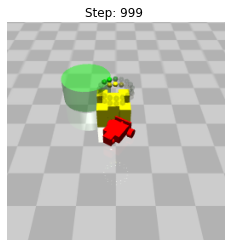

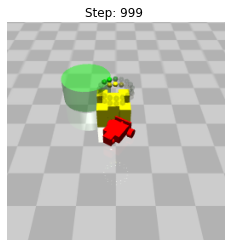

In [23]:
td3.env._old_render_mode = None
visualise_episode(td3)

# SPP-TD3 DoggoColumns (custom environment)

In [20]:
config = {
    'robot_base': 'xmls/doggo.xml',
    'task': 'goal',
    'observe_goal_lidar': True,
    'observe_pillars': True,
    'pillars_num': 10,
    'goal_size': 0.3,
    'goal_keepout': 0.305, 
}

env = Engine(config)
register(id='Safexp-DoggoColumns0-v0',
         entry_point='safety_gym.envs.mujoco:Engine',
         kwargs={'config': config})

model_path = "../models/DoggoColumns_spp-td3_model.pkl"

ENV_NAME = "Safexp-DoggoColumns0-v0"

td3 = TD3_AcM(
    env_name=ENV_NAME,
    acm_critic=True,    
    max_episode_steps=1000,
    min_max_denormalize=True,
    norm_closs=False,
    denormalize_actor_out=True,
    obs_norm=False,
    acm_ob_idx = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
    acm_fn = lambda in_dim, o_dim, lim, discr: BasicAcM(
            in_dim, o_dim, discr),
)

td3.load(model_path)

td3.test(5)

56.36596631256388

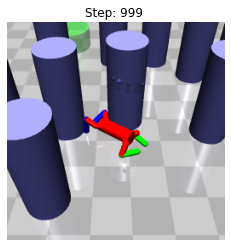

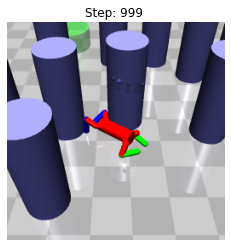

In [21]:
td3.env._old_render_mode = None
visualise_episode(td3)